In [26]:
!pip install openpyxl


[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
# =========================================================
# 🔢 Model SEI1I2R - Perbandingan Runge–Kutta Orde 4 vs Orde 7
# =========================================================

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# ---------------------------------------------------------
# 1️⃣ Fungsi Sistem Diferensial Model SEI1I2R
# ---------------------------------------------------------
def f(t, y):
    S, E, I1, I2, R = y

    # Parameter model sesuai jurnal
    N = 52
    pi = 0.6
    mu = 0.4
    alpha1 = 0.009
    alpha2 = 0.007
    beta = 0.83
    epsilon = 0.8
    tau = 0.16
    rho = 0.25
    delta = 0.25
    gamma = 0.5

    # Sistem persamaan diferensial
    dS = pi*N - S*(mu + alpha1*I1 + alpha2*I2)
    dE = S*(alpha1*I1 + alpha2*I2) - E*(mu + beta)
    dI1 = E*beta + rho*R + delta*I2 - I1*(mu + epsilon + tau)
    dI2 = I1*epsilon - I2*(mu + delta + gamma)
    dR = I1*tau - I2*gamma - R*(mu + rho)

    return np.array([dS, dE, dI1, dI2, dR])

# ---------------------------------------------------------
# 2️⃣ Fungsi Runge–Kutta Orde 4 (RK4)
# ---------------------------------------------------------
def rk4(f, y0, t):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n - 1):
        h = t[i + 1] - t[i]
        k1 = f(t[i], y[i])
        k2 = f(t[i] + h / 2, y[i] + h * k1 / 2)
        k3 = f(t[i] + h / 2, y[i] + h * k2 / 2)
        k4 = f(t[i] + h, y[i] + h * k3)
        y[i + 1] = y[i] + (h / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
    return y

# ---------------------------------------------------------
# 3️⃣ Fungsi Runge–Kutta Orde 7 (RK7)
# ---------------------------------------------------------
def rk7(f, y0, t):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n - 1):
        h = t[i + 1] - t[i]
        k1 = f(t[i], y[i])
        k2 = f(t[i] + h/6, y[i] + h*k1/6)
        k3 = f(t[i] + h/3, y[i] + h*(k1 + k2)/12)
        k4 = f(t[i] + h/2, y[i] + h*(k1 + 3*k3)/8)
        k5 = f(t[i] + 2*h/3, y[i] + h*(k1 - 3*k3 + 4*k4)/6)
        k6 = f(t[i] + 5*h/6, y[i] + h*(11*k1 - 54*k3 + 40*k4 + 27*k5)/150)
        k7 = f(t[i] + h, y[i] + h*(k1 + 4*k4 + k5)/6)
        y[i + 1] = y[i] + (h/90)*(7*k1 + 32*k3 + 12*k4 + 32*k5 + 7*k7)
    return y

# ---------------------------------------------------------
# 4️⃣ Jalankan Simulasi
# ---------------------------------------------------------
h= 0.001 # jarak antara titik x1 ke x2
t_0 = 0 # titik awal
t_end = 100
n = 100000

t = np.linspace(t_0, t_end, n)     # waktu 0–50 hari
y0 = np.array([24, 15, 6, 2, 5])  # kondisi awal (S, E, I1, I2, R)

rk4_res = rk4(f, y0, t)
rk7_res = rk7(f, y0, t)




In [28]:
# ---------------------------------------------------------
# 5️⃣ Perbandingan Hasil RK4 vs RK7
# ---------------------------------------------------------
# Hitung perbedaan absolut antara RK4 dan RK7
diff_abs = np.abs(rk4_res - rk7_res)

# Hitung perbedaan relatif (dalam persentase)
diff_rel = np.abs((rk4_res - rk7_res) / (rk7_res + 1e-10)) * 100  # +1e-10 untuk menghindari pembagian dengan nol



# ---------------------------------------------------------
# 7️⃣ Statistik Perbandingan
# ---------------------------------------------------------
print("="*60)
print("STATISTIK PERBANDINGAN RK4 vs RK7")
print("="*60)

for i, label in enumerate(labels):
    max_diff_abs = np.max(diff_abs[:, i])
    mean_diff_abs = np.mean(diff_abs[:, i])
    max_diff_rel = np.max(diff_rel[:, i])
    mean_diff_rel = np.mean(diff_rel[:, i])
    
    print(f"\n{label}:")
    print(f"  Perbedaan Absolut Maksimum: {max_diff_abs:.6f}")
    print(f"  Perbedaan Absolut Rata-rata: {mean_diff_abs:.6f}")
    print(f"  Perbedaan Relatif Maksimum: {max_diff_rel:.6f}%")
    print(f"  Perbedaan Relatif Rata-rata: {mean_diff_rel:.6f}%")

# ---------------------------------------------------------
# 8️⃣ Konversi ke Excel
# ---------------------------------------------------------
# Buat DataFrame untuk hasil RK4
df_rk4 = pd.DataFrame({
    'Waktu': t,
    'S_RK4': rk4_res[:, 0],
    'E_RK4': rk4_res[:, 1],
    'I1_RK4': rk4_res[:, 2],
    'I2_RK4': rk4_res[:, 3],
    'R_RK4': rk4_res[:, 4]
})

# Buat DataFrame untuk hasil RK7
df_rk7 = pd.DataFrame({
    'Waktu': t,
    'S_RK7': rk7_res[:, 0],
    'E_RK7': rk7_res[:, 1],
    'I1_RK7': rk7_res[:, 2],
    'I2_RK7': rk7_res[:, 3],
    'R_RK7': rk7_res[:, 4]
})

# Buat DataFrame untuk perbedaan
df_diff = pd.DataFrame({
    'Waktu': t,
    'Diff_S_Abs': diff_abs[:, 0],
    'Diff_E_Abs': diff_abs[:, 1],
    'Diff_I1_Abs': diff_abs[:, 2],
    'Diff_I2_Abs': diff_abs[:, 3],
    'Diff_R_Abs': diff_abs[:, 4],
    'Diff_S_Rel': diff_rel[:, 0],
    'Diff_E_Rel': diff_rel[:, 1],
    'Diff_I1_Rel': diff_rel[:, 2],
    'Diff_I2_Rel': diff_rel[:, 3],
    'Diff_R_Rel': diff_rel[:, 4]
})

# Gabungkan semua DataFrame
df_combined = pd.concat([df_rk4, df_rk7.drop('Waktu', axis=1), df_diff.drop('Waktu', axis=1)], axis=1)

# Simpan ke file Excel
excel_filename = 'Perbandingan_RK4_vs_RK7_Model_SEI1I2R.xlsx'
with pd.ExcelWriter(excel_filename, engine='openpyxl') as writer:
    df_combined.to_excel(writer, sheet_name='Data_Lengkap', index=False)
    df_rk4.to_excel(writer, sheet_name='Hasil_RK4', index=False)
    df_rk7.to_excel(writer, sheet_name='Hasil_RK7', index=False)
    df_diff.to_excel(writer, sheet_name='Perbedaan', index=False)
    
    # Buat sheet untuk statistik
    stats_data = []
    for i, label in enumerate(labels):
        stats_data.append({
            'Variabel': label,
            'Perbedaan_Absolut_Maksimum': np.max(diff_abs[:, i]),
            'Perbedaan_Absolut_Rata_rata': np.mean(diff_abs[:, i]),
            'Perbedaan_Relatif_Maksimum': np.max(diff_rel[:, i]),
            'Perbedaan_Relatif_Rata_rata': np.mean(diff_rel[:, i])
        })
    
    df_stats = pd.DataFrame(stats_data)
    df_stats.to_excel(writer, sheet_name='Statistik_Perbandingan', index=False)

print(f"\nData berhasil disimpan ke file: {excel_filename}")

# ---------------------------------------------------------
# 9️⃣ Ringkasan Akhir
# ---------------------------------------------------------
print("\n" + "="*60)
print("RINGKASAN PERBANDINGAN")
print("="*60)
print(f"Waktu simulasi: {t[0]} hingga {t[-1]} hari")
print(f"Jumlah titik data: {len(t)}")
print(f"Kondisi awal: S={y0[0]}, E={y0[1]}, I1={y0[2]}, I2={y0[3]}, R={y0[4]}")
print(f"File Excel berisi:")
print(f"  - Data lengkap RK4, RK7, dan perbedaan")
print(f"  - Hasil terpisah untuk RK4 dan RK7")
print(f"  - Data perbedaan absolut dan relatif")
print(f"  - Statistik perbandingan")

STATISTIK PERBANDINGAN RK4 vs RK7

Susceptible (S):
  Perbedaan Absolut Maksimum: 0.001115
  Perbedaan Absolut Rata-rata: 0.000118
  Perbedaan Relatif Maksimum: 0.002362%
  Perbedaan Relatif Rata-rata: 0.000191%

Exposed (E):
  Perbedaan Absolut Maksimum: 0.001074
  Perbedaan Absolut Rata-rata: 0.000034
  Perbedaan Relatif Maksimum: 0.115414%
  Perbedaan Relatif Rata-rata: 0.065203%

Infected 1 (I1):
  Perbedaan Absolut Maksimum: 0.000601
  Perbedaan Absolut Rata-rata: 0.000024
  Perbedaan Relatif Maksimum: 0.114278%
  Perbedaan Relatif Rata-rata: 0.064163%

Infected 2 (I2):
  Perbedaan Absolut Maksimum: 0.000428
  Perbedaan Absolut Rata-rata: 0.000019
  Perbedaan Relatif Maksimum: 0.113879%
  Perbedaan Relatif Rata-rata: 0.063664%

Recovered (R):
  Perbedaan Absolut Maksimum: 0.000366
  Perbedaan Absolut Rata-rata: 0.000016
  Perbedaan Relatif Maksimum: 1400.824778%
  Perbedaan Relatif Rata-rata: 0.169209%

Data berhasil disimpan ke file: Perbandingan_RK4_vs_RK7_Model_SEI1I2R.xlsx

RI

C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


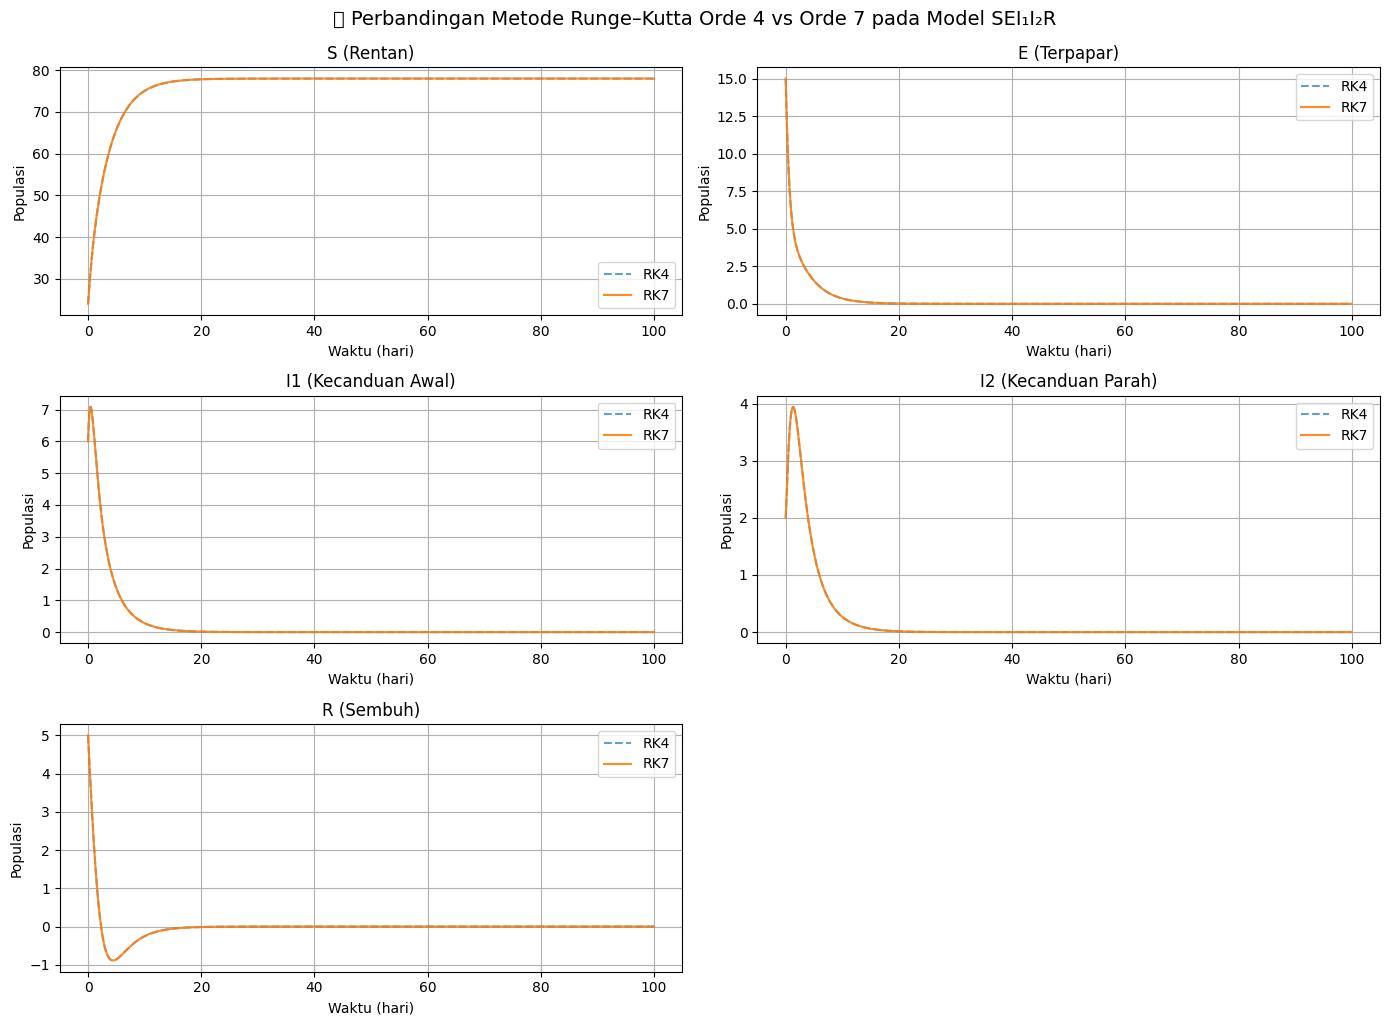

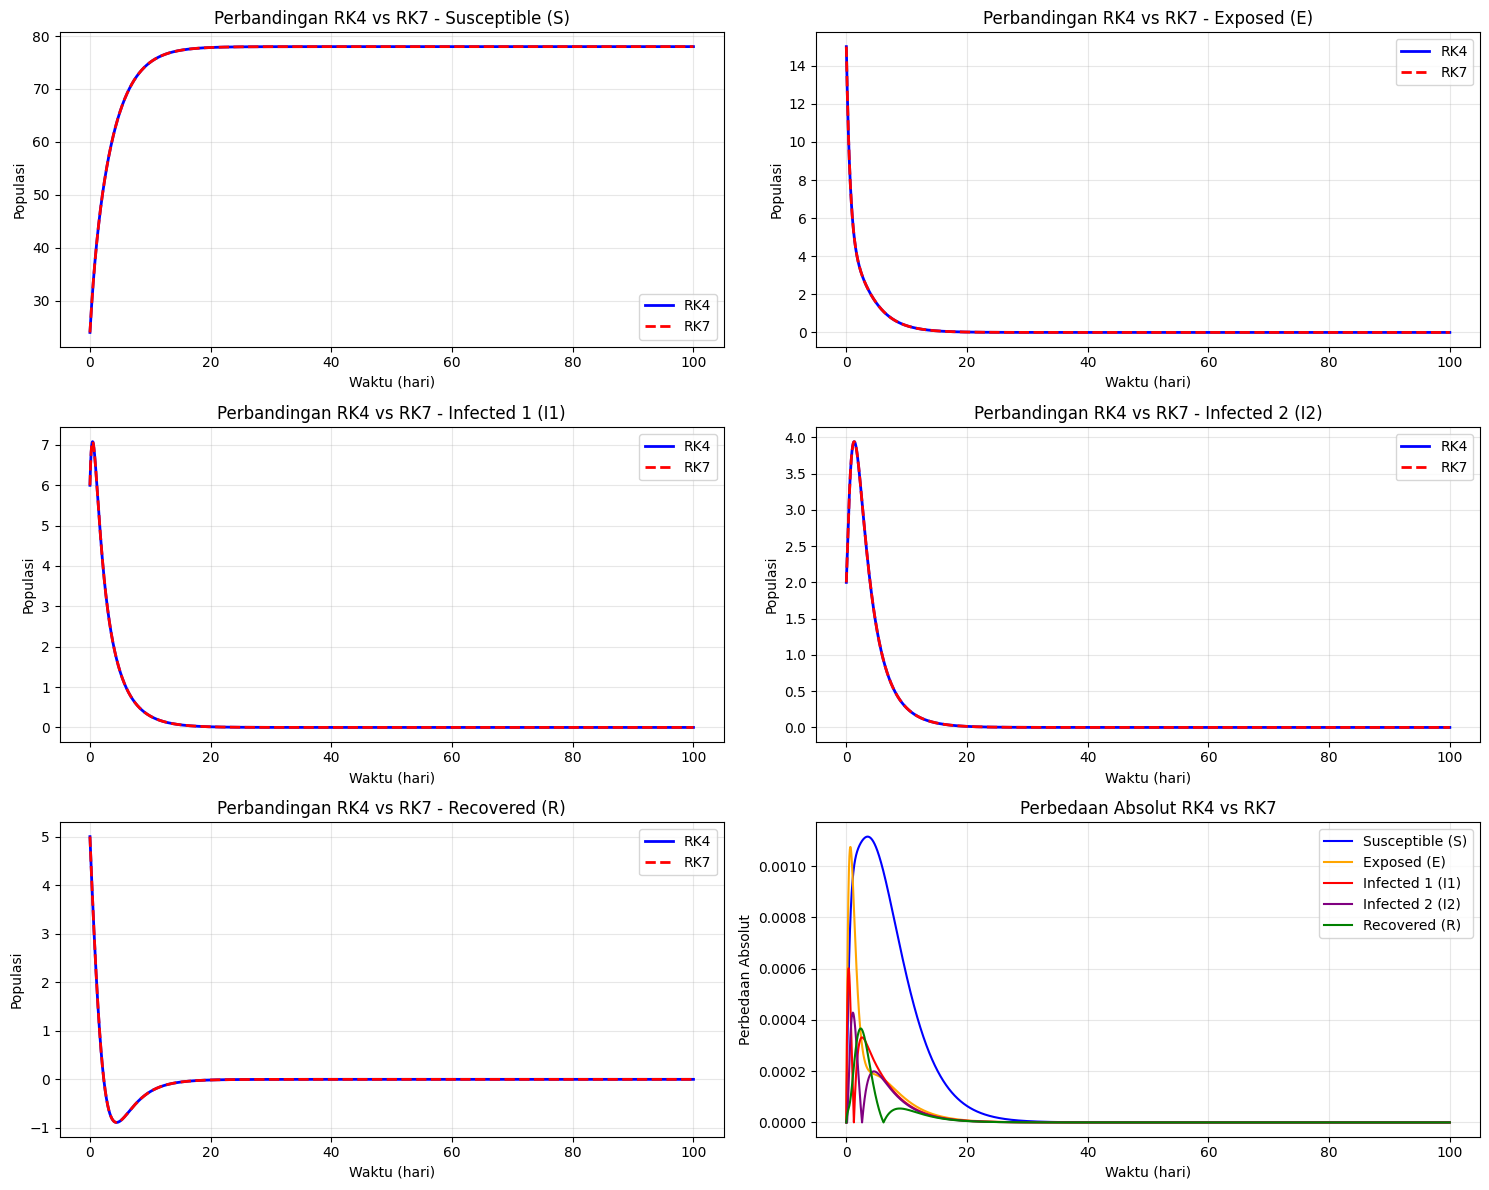

In [29]:
# ---------------------------------------------------------
# 5️⃣ Visualisasi Perbandingan RK4 vs RK7
# ---------------------------------------------------------
labels = ['S (Rentan)', 'E (Terpapar)', 'I1 (Kecanduan Awal)', 'I2 (Kecanduan Parah)', 'R (Sembuh)']
plt.figure(figsize=(14, 10))

for i in range(5):
    plt.subplot(3, 2, i+1)
    plt.plot(t, rk4_res[:, i], '--', label='RK4', alpha=0.7)
    plt.plot(t, rk7_res[:, i], '-', label='RK7', alpha=0.9)
    plt.title(labels[i])
    plt.xlabel('Waktu (hari)')
    plt.ylabel('Populasi')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.suptitle("📊 Perbandingan Metode Runge–Kutta Orde 4 vs Orde 7 pada Model SEI₁I₂R", fontsize=14, y=1.02)
plt.show()

# ---------------------------------------------------------
# 6️⃣ Visualisasi Perbandingan
# ---------------------------------------------------------
labels = ['Susceptible (S)', 'Exposed (E)', 'Infected 1 (I1)', 'Infected 2 (I2)', 'Recovered (R)']
colors = ['blue', 'orange', 'red', 'purple', 'green']

plt.figure(figsize=(15, 12))

# Plot hasil RK4 dan RK7
for i in range(5):
    plt.subplot(3, 2, i+1)
    plt.plot(t, rk4_res[:, i], 'b-', linewidth=2, label='RK4')
    plt.plot(t, rk7_res[:, i], 'r--', linewidth=2, label='RK7')
    plt.xlabel('Waktu (hari)')
    plt.ylabel('Populasi')
    plt.title(f'Perbandingan RK4 vs RK7 - {labels[i]}')
    plt.legend()
    plt.grid(True, alpha=0.3)

# Plot perbedaan absolut
plt.subplot(3, 2, 6)
for i in range(5):
    plt.plot(t, diff_abs[:, i], label=labels[i], color=colors[i])
plt.xlabel('Waktu (hari)')
plt.ylabel('Perbedaan Absolut')
plt.title('Perbedaan Absolut RK4 vs RK7')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()